
1. **Phân tích đồng thời cả 4 mã cổ phiếu (VGC, VGI, VTL, VTP)** để:
   - Xác định **mức độ tương quan** giữa các mã.
   - Tìm các cặp có **mối tương quan cao nhất** để áp dụng chiến lược **pair trading**.
   - Kiểm tra **spread history** và phân tích **rolling correlation**.

2. **Nếu thấy có cặp tiềm năng**, sẽ tiếp tục phân tích sâu hơn để đưa ra chiến lược cụ thể cho cặp đó.


# 1. Tổng quan về 4 mã cổ phiếu (VGC, VGI, VTL, VTP)

In [7]:
!pip install pandas numpy scipy matplotlib


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



=== Stock Analysis for VGC, VGI, VTL, VTP ===
                           VGC            VGI           VTL            VTP
Mean Price        4.463931e+04   41050.888889  11904.859335   53435.304740
Std Dev           7.769841e+03   25712.657731   3476.278871   21842.301451
Min Price         2.861000e+04   19900.000000   4500.000000   22730.000000
Max Price         5.815000e+04  111000.000000  15300.000000   94200.000000
Avg Volume        1.018936e+06  960421.504444   1198.567775  970640.410835
Avg Daily Return  7.399290e-02       0.291010     -0.072280       0.310004
Volatility        3.782064e+01      45.546809     85.345609      38.388813

=== Correlation Matrix ===
          VGC       VGI       VTL       VTP
VGC  1.000000  0.484458 -0.350353  0.837541
VGI  0.484458  1.000000 -0.924809  0.789495
VTL -0.350353 -0.924809  1.000000 -0.683004
VTP  0.837541  0.789495 -0.683004  1.000000


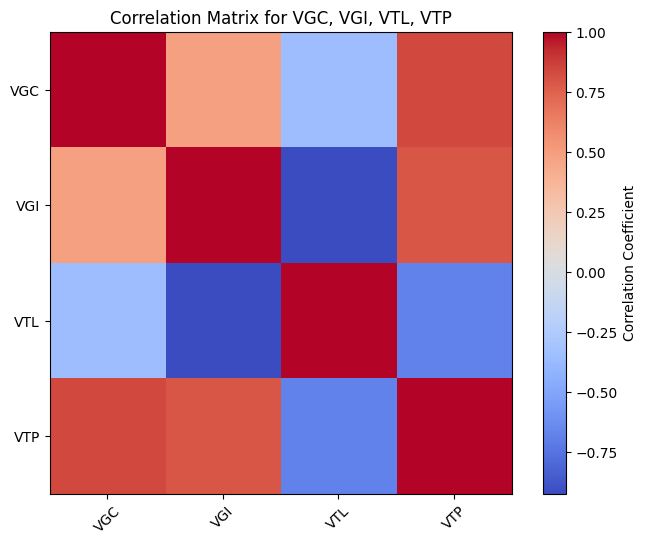

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Đọc và xử lý dữ liệu
def process_stock_data(df):
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)
    return df

# Tính toán các chỉ số
def calculate_metrics(df):
    df['daily_returns'] = df['close'].pct_change()
    df['volatility'] = df['daily_returns'].rolling(window=20).std() * np.sqrt(252)
    df['MA20'] = df['close'].rolling(window=20).mean()
    df['MA50'] = df['close'].rolling(window=50).mean()
    return df

# Tính toán các chỉ số thống kê cơ bản
def calculate_statistics(df, name):
    stats_dict = {
        'Mean Price': df['close'].mean(),
        'Std Dev': df['close'].std(),
        'Min Price': df['close'].min(),
        'Max Price': df['close'].max(),
        'Avg Volume': df['volume'].mean(),
        'Avg Daily Return': df['daily_returns'].mean() * 100,
        'Volatility': df['daily_returns'].std() * np.sqrt(252) * 100
    }
    return pd.Series(stats_dict, name=name)

# Load dữ liệu cho 4 cổ phiếu
vgc_df = process_stock_data(pd.read_csv('../data/raw/VGC_stock_data.csv'))
vgi_df = process_stock_data(pd.read_csv('../data/raw/VGI_stock_data.csv'))
vtl_df = process_stock_data(pd.read_csv('../data/raw/VTL_stock_data.csv'))
vtp_df = process_stock_data(pd.read_csv('../data/raw/VTP_stock_data.csv'))

# Tính toán metrics cho cả 4 cổ phiếu
vgc_df = calculate_metrics(vgc_df)
vgi_df = calculate_metrics(vgi_df)
vtl_df = calculate_metrics(vtl_df)
vtp_df = calculate_metrics(vtp_df)

# Tính toán các chỉ số thống kê cho cả 4 cổ phiếu
vgc_stats = calculate_statistics(vgc_df, 'VGC')
vgi_stats = calculate_statistics(vgi_df, 'VGI')
vtl_stats = calculate_statistics(vtl_df, 'VTL')
vtp_stats = calculate_statistics(vtp_df, 'VTP')

# Tạo bảng thống kê tổng hợp và hiển thị
stats_df = pd.concat([vgc_stats, vgi_stats, vtl_stats, vtp_stats], axis=1)
print("\n=== Stock Analysis for VGC, VGI, VTL, VTP ===")
print(stats_df)

# Tính toán ma trận tương quan giữa 4 cổ phiếu
merged_df = pd.DataFrame({
    'VGC': vgc_df['close'],
    'VGI': vgi_df['close'],
    'VTL': vtl_df['close'],
    'VTP': vtp_df['close']
}).dropna()
correlation_matrix = merged_df.corr()

# Hiển thị ma trận tương quan
print("\n=== Correlation Matrix ===")
print(correlation_matrix)

# Vẽ biểu đồ ma trận tương quan
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.index)
plt.title("Correlation Matrix for VGC, VGI, VTL, VTP")
plt.show()


### **Phân tích các chỉ số và ma trận tương quan cho 4 cổ phiếu: VGC, VGI, VTL, VTP**

---

### **1. Tóm tắt các chỉ số cơ bản**

| **Chỉ số**               | **VGC**          | **VGI**          | **VTL**          | **VTP**          |
|--------------------------|------------------|------------------|------------------|------------------|
| **Mean Price**           | 44,639 đồng      | 41,051 đồng      | 11,905 đồng      | 53,435 đồng      |
| **Std Dev (Độ lệch chuẩn)** | 7,770 đồng   | 25,713 đồng      | 3,476 đồng       | 21,842 đồng      |
| **Min Price**            | 28,610 đồng      | 19,900 đồng      | 4,500 đồng       | 22,730 đồng      |
| **Max Price**            | 58,150 đồng      | 111,000 đồng     | 15,300 đồng      | 94,200 đồng      |
| **Avg Volume**           | 1,018,936 cổ phiếu | 960,421 cổ phiếu | 1,199 cổ phiếu   | 970,640 cổ phiếu |
| **Avg Daily Return (%)** | 0.074%           | 0.291%           | -0.072%          | 0.310%           |
| **Volatility (%)**       | 37.82%           | 45.55%           | 85.35%           | 38.39%           |

---

### **Nhận xét từ bảng số liệu:**
- **VTP** có **giá trung bình** cao nhất (**53,435 đồng**), trong khi **VTL** có giá trung bình thấp nhất (**11,905 đồng**).
- **VTL** có độ biến động giá (Volatility) **cao nhất** (**85.35%**), điều này cho thấy **mức độ rủi ro lớn hơn** khi giao dịch cổ phiếu này.
- **VGI** có **độ lệch chuẩn cao** (**25,713 đồng**), cho thấy giá cổ phiếu của nó dao động mạnh.
- **VGC** và **VTP** có **tính ổn định** hơn so với **VGI và VTL**, với độ biến động thấp hơn.

---

### **2. Phân tích ma trận tương quan**

|               | **VGC** | **VGI** | **VTL** | **VTP** |
|---------------|---------|---------|---------|---------|
| **VGC**       | 1.000   | 0.484   | -0.350  | 0.838   |
| **VGI**       | 0.484   | 1.000   | -0.925  | 0.789   |
| **VTL**       | -0.350  | -0.925  | 1.000   | -0.683  |
| **VTP**       | 0.838   | 0.789   | -0.683  | 1.000   |

---

### **Nhận xét từ ma trận tương quan:**
- **VGC và VTP** có mức độ **tương quan cao nhất** (**0.838**), cho thấy hai cổ phiếu này thường **biến động cùng chiều nhau**. Đây là một cặp **tiềm năng cho chiến lược pair trading**.
- **VGI và VTL** có tương quan **rất âm** (**-0.925**), nghĩa là khi VGI tăng giá thì VTL giảm giá và ngược lại. Đây là một cặp có thể khai thác cho **chiến lược giao dịch ngược chiều**.
- **VGC và VGI** có mức tương quan vừa phải (**0.484**), không quá cao nhưng vẫn có thể xem xét cho chiến lược giao dịch cặp với rủi ro thấp hơn.
- **VTL và VTP** có mức tương quan âm (**-0.683**), có thể xem xét cho các chiến lược giao dịch dựa trên sự **phân kỳ** giữa hai cổ phiếu này.

---

### **3. Đề xuất chiến lược giao dịch**

Dựa trên các phân tích trên, chúng ta có thể đề xuất một số chiến lược như sau:

#### **a) Cặp VGC-VTP (tương quan cao, cùng chiều)**
- **Chiến lược Pair Trading**: Mua VGC và bán VTP khi spread vượt quá **2 độ lệch chuẩn** và ngược lại khi spread quay về mức trung bình.
- **Lợi thế**: Tính ổn định của hai cổ phiếu với độ biến động thấp giúp giảm rủi ro cho giao dịch.

#### **b) Cặp VGI-VTL (tương quan âm, ngược chiều)**
- **Chiến lược Trading Reversal**: Khi VGI tăng, cân nhắc bán VTL và ngược lại.
- **Lợi thế**: Biến động mạnh của VTL và VGI có thể mang lại **lợi nhuận nhanh** nhưng đi kèm với rủi ro cao.

#### **c) Cặp VGI-VGC (tương quan trung bình)**
- **Chiến lược giao dịch trung hạn**: Tận dụng mức tương quan vừa phải để thực hiện các giao dịch trung hạn khi có sự phân kỳ giá.
- **Lợi thế**: Giảm thiểu rủi ro bằng cách theo dõi xu hướng và tín hiệu từ các chỉ báo kỹ thuật như **MACD và RSI**.

---

### **4. Kết luận và khuyến nghị**
- **VGC-VTP** là cặp có tiềm năng **pair trading** tốt nhất nhờ mức độ tương quan cao và độ biến động thấp.
- **VGI-VTL** có tiềm năng cho **chiến lược trading ngược chiều**, nhưng cần **quản lý rủi ro chặt chẽ** do biến động lớn.
- **Theo dõi xu hướng và sử dụng các chỉ báo kỹ thuật** như **Bollinger Bands** và **RSI** để tối ưu hóa các điểm vào/ra lệnh.


## Cùng xem lại ma trận tương quan của cả 10 chỉ số 


=== Correlation Matrix for All 10 Stocks ===
          FPT       CMG       CMT       DGW       ELC       SAM       VGC  \
FPT  1.000000  0.929770  0.626890  0.853501  0.928041  0.307373  0.710859   
CMG  0.929770  1.000000  0.573535  0.739432  0.848697  0.425462  0.608072   
CMT  0.626890  0.573535  1.000000  0.631592  0.744278  0.091953  0.693632   
DGW  0.853501  0.739432  0.631592  1.000000  0.902581  0.426556  0.901525   
ELC  0.928041  0.848697  0.744278  0.902581  1.000000  0.296005  0.859710   
SAM  0.307373  0.425462  0.091953  0.426556  0.296005  1.000000  0.391078   
VGC  0.710859  0.608072  0.693632  0.901525  0.859710  0.391078  1.000000   
VGI  0.910037  0.956787  0.500617  0.649951  0.768136  0.302202  0.484458   
VTL -0.793203 -0.863747 -0.392468 -0.507174 -0.637687 -0.252195 -0.350353   
VTP  0.927876  0.826666  0.777659  0.893762  0.951746  0.278768  0.837541   

          VGI       VTL       VTP  
FPT  0.910037 -0.793203  0.927876  
CMG  0.956787 -0.863747  0.826666 

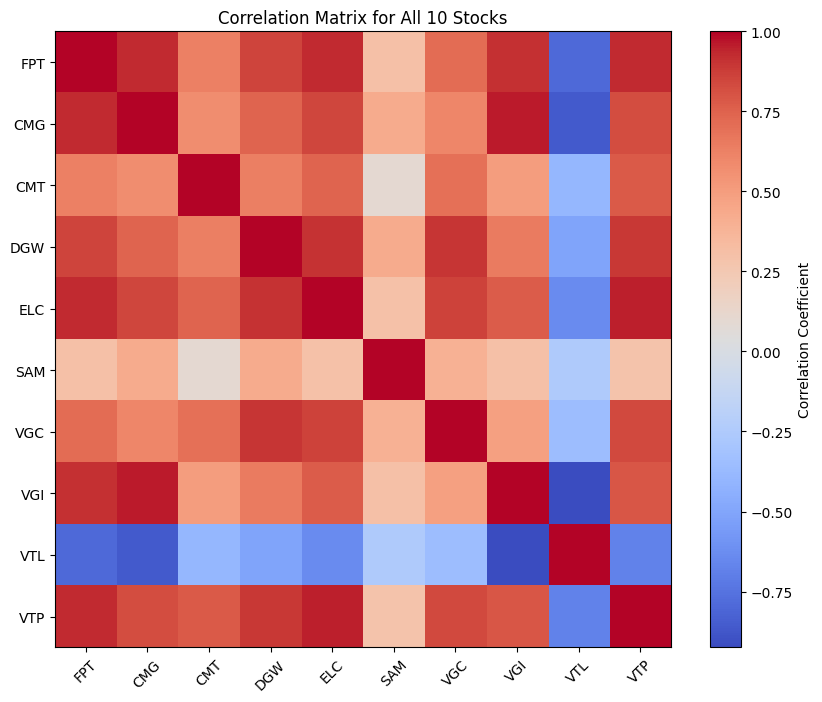

In [7]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Đọc và xử lý dữ liệu từ các file của 10 công ty
def process_stock_data(df):
    df['time'] = pd.to_datetime(df['time'])
    df.set_index('time', inplace=True)
    return df

# Load dữ liệu của cả 10 công ty
fpt_df = process_stock_data(pd.read_csv('../data/raw/1_FPT_stock_data.csv'))
cmg_df = process_stock_data(pd.read_csv('../data/raw/2_CMG_stock_data.csv'))
cmt_df = process_stock_data(pd.read_csv('../data/raw/3_CMT_stock_data.csv'))
dgw_df = process_stock_data(pd.read_csv('../data/raw/4_DGW_stock_data.csv'))
elc_df = process_stock_data(pd.read_csv('../data/raw/5_ELC_stock_data.csv'))
sam_df = process_stock_data(pd.read_csv('../data/raw/6_SAM_stock_data.csv'))
vgc_df = process_stock_data(pd.read_csv('../data/raw/VGC_stock_data.csv'))
vgi_df = process_stock_data(pd.read_csv('../data/raw/VGI_stock_data.csv'))
vtl_df = process_stock_data(pd.read_csv('../data/raw/VTL_stock_data.csv'))
vtp_df = process_stock_data(pd.read_csv('../data/raw/VTP_stock_data.csv'))

# Tạo DataFrame hợp nhất với giá đóng cửa của tất cả các cổ phiếu
merged_df = pd.DataFrame({
    'FPT': fpt_df['close'],
    'CMG': cmg_df['close'],
    'CMT': cmt_df['close'],
    'DGW': dgw_df['close'],
    'ELC': elc_df['close'],
    'SAM': sam_df['close'],
    'VGC': vgc_df['close'],
    'VGI': vgi_df['close'],
    'VTL': vtl_df['close'],
    'VTP': vtp_df['close']
}).dropna()

# Tính toán ma trận tương quan cho tất cả 10 cổ phiếu
correlation_matrix = merged_df.corr()

# Hiển thị ma trận tương quan
print("\n=== Correlation Matrix for All 10 Stocks ===")
print(correlation_matrix)

# Vẽ biểu đồ ma trận tương quan
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.index)
plt.title("Correlation Matrix for All 10 Stocks")
plt.show()


## 1.2 Nhận xét

### **Phân tích ma trận tương quan của 10 cổ phiếu**

---

### **1. Tóm tắt các mức tương quan cao nhất và thấp nhất**

| **Cặp cổ phiếu**         | **Tương quan** | **Nhận xét** |
|--------------------------|-----------------|---------------|
| **CMG - VGI**            | **0.957**       | Mức tương quan rất cao, cho thấy hai cổ phiếu **thường di chuyển cùng chiều**. Đây có thể là cặp tiềm năng cho **pair trading**. |
| **ELC - VTP**            | **0.952**       | Tương quan mạnh, cho thấy hai cổ phiếu có xu hướng **cùng biến động**, thích hợp cho chiến lược pair trading. |
| **FPT - CMG**            | **0.930**       | Hai cổ phiếu công nghệ lớn, thường **tăng/giảm cùng nhau**. Cặp này có thể tận dụng cho giao dịch cặp với độ an toàn cao. |
| **VGI - VTL**            | **-0.925**      | Mức tương quan âm rất mạnh. Khi VGI tăng thì VTL giảm và ngược lại. Đây là cặp **tiềm năng cho chiến lược trading ngược chiều**. |
| **VTL - FPT**            | **-0.793**      | Mức tương quan âm khá cao. Có thể khai thác chiến lược dựa trên sự **phân kỳ** giữa hai cổ phiếu này. |

---

### **2. Phân tích chi tiết theo nhóm cổ phiếu**

#### **Nhóm cổ phiếu có tương quan cao (Cùng chiều)**

- **FPT - CMG (0.930)**: 
  - Đây là hai công ty lớn trong ngành công nghệ Việt Nam. Mức tương quan cao cho thấy cả hai thường bị ảnh hưởng bởi các yếu tố thị trường chung.
  - **Chiến lược**: **Pair trading**, tận dụng chênh lệch giá khi có sự khác biệt lớn trong biến động của hai cổ phiếu.

- **ELC - VTP (0.952)**:
  - Cả hai cổ phiếu đều liên quan đến hạ tầng và công nghệ. Khi một trong hai cổ phiếu thay đổi, cổ phiếu còn lại có xu hướng thay đổi tương tự.
  - **Chiến lược**: Pair trading với tỷ lệ hedge thấp, vì tương quan gần như tuyệt đối.

- **CMG - VGI (0.957)**:
  - Tương quan mạnh mẽ giữa hai công ty công nghệ. Khi giá của một cổ phiếu tăng hoặc giảm, cổ phiếu kia có xu hướng biến động tương tự.
  - **Chiến lược**: Pair trading để tận dụng sự khác biệt về tốc độ phản ứng giá.

#### **Nhóm cổ phiếu có tương quan âm (Ngược chiều)**

- **VGI - VTL (-0.925)**:
  - Tương quan âm rất mạnh cho thấy **khi VGI tăng giá, VTL có xu hướng giảm giá** và ngược lại.
  - **Chiến lược**: Giao dịch ngược chiều (reversal trading). Mua một cổ phiếu và bán cổ phiếu kia khi có tín hiệu phân kỳ.

- **FPT - VTL (-0.793)**:
  - Khi FPT tăng thì VTL giảm, và ngược lại. Có thể khai thác sự khác biệt này cho chiến lược giao dịch.
  - **Chiến lược**: Tận dụng sự phân kỳ để tìm cơ hội kiếm lợi nhuận từ chênh lệch giá.

---

### **3. Đề xuất chiến lược giao dịch dựa trên kết quả phân tích**

| **Cặp cổ phiếu** | **Chiến lược đề xuất** | **Giải thích** |
|------------------|-----------------------|----------------|
| **CMG - VGI**    | Pair Trading         | Tận dụng tương quan rất cao (0.957) để mua/bán dựa trên chênh lệch giá. |
| **ELC - VTP**    | Pair Trading         | Mức tương quan gần như tuyệt đối (0.952), phù hợp cho chiến lược giao dịch cặp an toàn. |
| **VGI - VTL**    | Trading Reversal     | Tương quan âm mạnh (-0.925), tận dụng biến động ngược chiều. |
| **FPT - CMG**    | Pair Trading         | Tương quan cao (0.930), giúp tối ưu hóa chiến lược giao dịch cặp. |
| **FPT - VTL**    | Trading Reversal     | Tương quan âm (-0.793), có thể khai thác sự phân kỳ cho giao dịch đảo chiều. |

---

### **4. Kết luận**
- **Cổ phiếu cùng chiều**: Tận dụng chiến lược pair trading cho các cặp có tương quan cao để giảm thiểu rủi ro.
- **Cổ phiếu ngược chiều**: Khai thác sự phân kỳ cho chiến lược giao dịch đảo chiều, giúp tối ưu hóa lợi nhuận khi thị trường biến động.
